<a href="https://colab.research.google.com/github/MsSaidat25/Gen-Ai/blob/main/Fine_Tune_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

# Check the current TensorFlow version
print(tf.__version__)

# Install required packages with a compatible TensorFlow version
!pip install --upgrade keras-cv keras-core tensorflow-datasets==4.9.7

2.19.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 68.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.9.9
    Uninstalling tensorflow-datasets-4.9.9:
      Successfully uninstalled tensorflow-datasets-4.9.9


In [3]:
import json
import math
import keras_cv
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
from keras import losses
import numpy as np
from keras import metrics
import matplotlib.pyplot as plt


In [4]:
!wget -nc https://archive.org/download/lions_cheetahs/lions_cheetahs.zip

--2026-02-13 11:40:15--  https://archive.org/download/lions_cheetahs/lions_cheetahs.zip
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dn721905.ca.archive.org/0/items/lions_cheetahs/lions_cheetahs.zip [following]
--2026-02-13 11:40:16--  https://dn721905.ca.archive.org/0/items/lions_cheetahs/lions_cheetahs.zip
Resolving dn721905.ca.archive.org (dn721905.ca.archive.org)... 204.62.247.77
Connecting to dn721905.ca.archive.org (dn721905.ca.archive.org)|204.62.247.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74771166 (71M) [application/zip]
Saving to: ‘lions_cheetahs.zip’

lions_cheetahs.zip  100%[===================>]  71.31M  54.0MB/s    in 1.3s    

2026-02-13 11:40:18 (54.0 MB/s) - ‘lions_cheetahs.zip’ saved [74771166/74771166]



In [5]:
!unzip -nq lions_cheetahs.zip

In [6]:
!ls

images	lions_cheetahs.zip  sample_data


In [7]:
!ls images
# we need to train-validation split manually
# confirm folder structure

Cheetahs  Lions


In [8]:
!ls images/Cheetahs/

0052cb267268c59e.jpg  0c20fa69621a2e6c.jpg  4d5ff3bad0444108.jpg
00707659aba29334.jpg  0c61b8d86a3e0889.jpg  519587ae1f0b5160.jpg
007f9ffc01c7b106.jpg  0c6e90e19f2b2bbc.jpg  5233078010f25f0c.jpg
00bb45a8568a3474.jpg  0db6601682a368e8.jpg  52b64d96fc0647e8.jpg
00c8d36882dd6d37.jpg  0fb021bac7207533.jpg  601c4f42bfb9c50d.jpg
00d100b0231b60e6.jpg  11377ee99115ffff.jpg  6795bb2c553f4981.jpg
00d9eb862ba3dfc6.jpg  113fbf2203ccef57.jpg  6d613ea1b58411f1.jpg
012f5ecbf49e1da0.jpg  1140e3015190cfeb.jpg  75ea322880cfcc3a.jpg
01750ba1a197e3ad.jpg  11c270e6589dce6e.jpg  767e3c2968ff1890.jpg
01d688c043bdbfbb.jpg  12271a9ed07dc28e.jpg  775f869903916081.jpg
0230496e4a8ed917.jpg  135b67b72eb7bb47.jpg  784940fed90cccc2.jpg
02871f24d5abe59c.jpg  13626a8bd4c27b49.jpg  7f33de86429cef7f.jpg
029b39c0b65ebeb3.jpg  13cec8f6c995afba.jpg  8b48ed579956d124.jpg
02a0439923768403.jpg  150bf6ac5d17ed58.jpg  8f34ab7a9b7a8f9b.jpg
02a5846a35629f1d.jpg  177a51628b923b71.jpg  9a470427f0a875d2.jpg
02b086c4e96396f6.jpg  1be

In [9]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    'images',
    image_size=(224, 224),
    validation_split=0.3,
    subset='both',
    seed=123,
)

Found 200 files belonging to 2 classes.
Using 140 files for training.
Using 60 files for validation.


In [10]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
# Shuffle the dataset to increase diversity of batches.
train_ds = train_ds.shuffle(
    10 * 32, reshuffle_each_iteration=True
)

(32, 224, 224, 3)


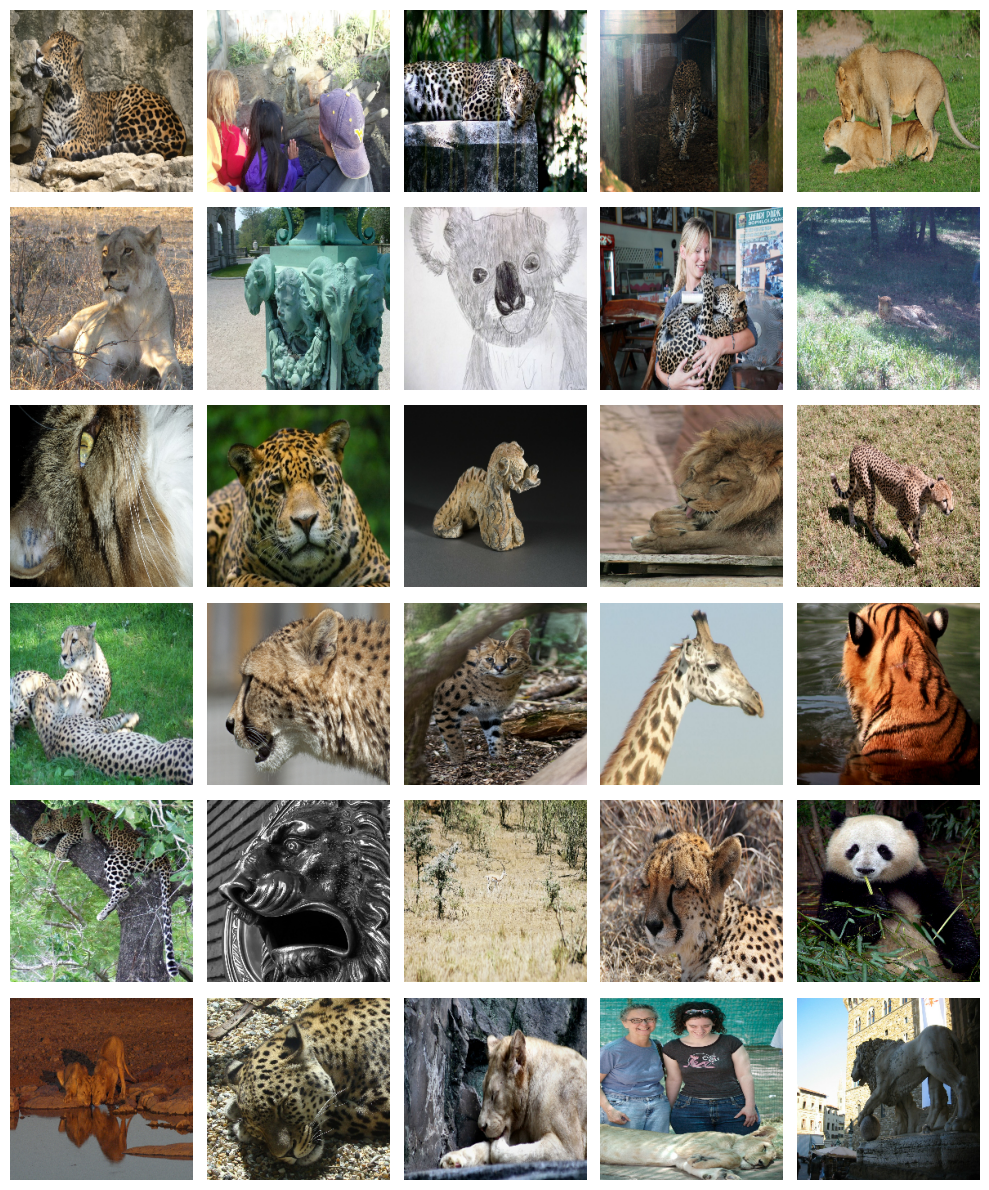

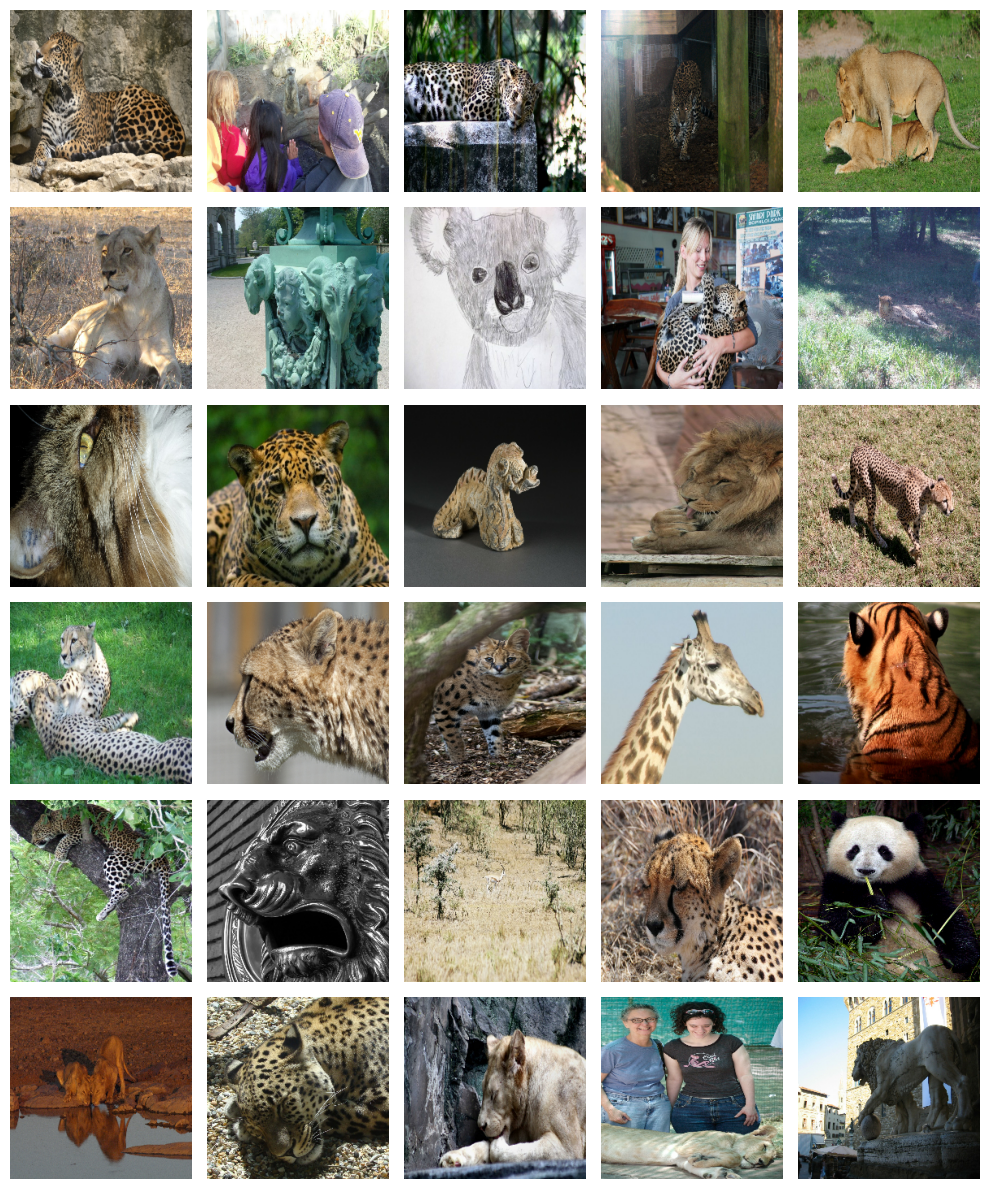

In [15]:
images = next(iter(train_ds.take(1)))[0]
print(images.shape)
keras_cv.visualization.plot_image_gallery(images, value_range=(0, 255))

In [16]:
model = keras_cv.models.ImageClassifier.from_preset(
    "efficientnetv2_b0_imagenet", num_classes=2
)
model.compile(
    loss="sparse_categorical_crossentropy",
    # optimizer=tf.optimizers.SGD(learning_rate=0.01),
    optimizer=tf.keras.optimizers.AdamW(),
    metrics=["accuracy"],
)

100%|██████████| 1.79k/1.79k [00:00<00:00, 3.15MB/s]


In [17]:
r = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 156s 16s/step - accuracy: 0.6834 - loss: 0.6060 - val_accuracy: 0.8333 - val_loss: 0.3419
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 275ms/step - accuracy: 0.9801 - loss: 0.1837 - val_accuracy: 0.8833 - val_loss: 0.1959
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.9802 - loss: 0.0912 - val_accuracy: 0.9833 - val_loss: 0.1328
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.9762 - loss: 0.0591 - val_accuracy: 0.9333 - val_loss: 0.1566
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 290ms/step - accuracy: 1.0000 - loss: 0.0182 - val_accuracy: 0.9333 - val_loss: 0.2004
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 0.9000 - val_loss: 0.2256
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.9167 - val_loss: 0.2371
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 0.9333 - val_loss:

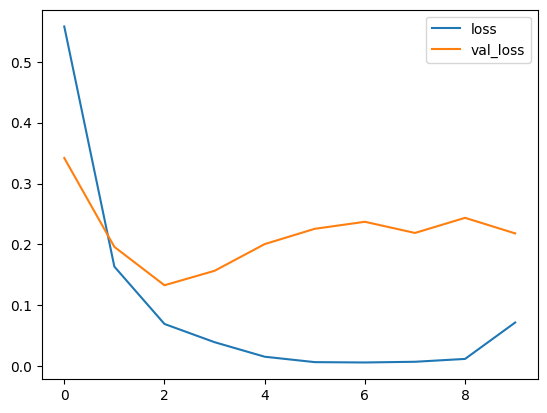

In [18]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

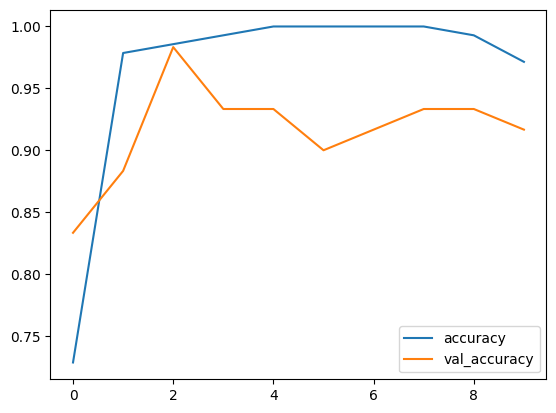

In [19]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

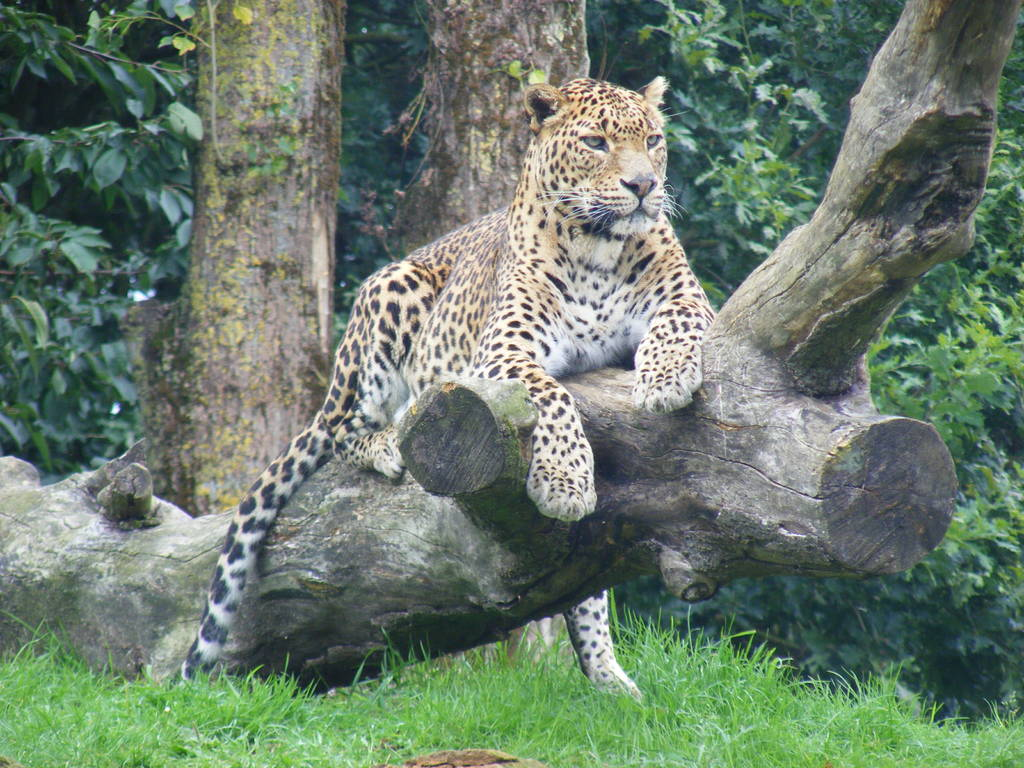

In [20]:
# Make a prediction on a single image
from PIL import Image

path = 'images/Cheetahs/ed51aa4321f10a21.jpg'
im = Image.open(path)
im

In [21]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

In [22]:
np_im = np.asarray(im)

In [23]:
np_im.shape

(768, 1024, 3)

In [24]:
resizing = keras_cv.layers.Resizing(
    224, 224, crop_to_aspect_ratio=True
)

In [25]:
resizing

<Resizing name=resizing, built=True>

In [26]:
np_im_rs = resizing(np_im)
np_im_rs

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[ 42.4949  ,  56.209183,  51.94388 ],
        [ 46.663265,  72.81122 ,  58.234695],
        [ 96.311226, 133.68367 , 116.34183 ],
        ...,
        [ 55.928608,  80.35718 ,  83.14293 ],
        [ 55.07668 ,  78.22461 ,  86.28593 ],
        [ 59.423473,  82.06633 ,  94.39796 ]],

       [[ 43.42347 ,  82.5     ,  41.918365],
        [ 77.63775 , 119.20918 ,  90.051025],
        [105.90306 , 146.36224 , 133.7857  ],
        ...,
        [ 34.734688,  66.0204  ,  52.806118],
        [ 48.82666 ,  80.11237 ,  67.61237 ],
        [ 42.872494,  74.15821 ,  61.658207]],

       [[ 79.239784, 122.85713 ,  74.27039 ],
        [ 80.67346 , 127.244896,  73.959175],
        [ 69.41837 , 117.34694 ,  66.19387 ],
        ...,
        [ 47.051003,  79.12243 ,  63.979576],
        [ 28.734863,  66.52058 ,  43.592007],
        [ 49.852028,  89.311195,  63.979588]],

       ...,

       [[133.6836  , 191.75505 , 139.541   ],
        [ 93.

In [27]:
np_im_rs.shape

TensorShape([224, 224, 3])

In [28]:
x = tf.reshape(np_im_rs, (1, 224, 224, 3))

In [29]:
out = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


In [30]:
out

array([[9.993494e-01, 6.505669e-04]], dtype=float32)

In [32]:
val_ds.class_names

['Cheetahs', 'Lions']